In [4]:
import sys
import glob
import itertools

import math
import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt
from netCDF4 import Dataset # module to open netcdf
import os
import pylab
import sys  #module to get external varaibles
import scipy.signal
import time
loc="/home/vestella/Python/notebooks/VLR"
os.chdir(loc)
from binDensity import eosNeutral

loc="/data/igcmg/database/grids"
os.chdir(loc)
os.getcwd()
file2read1 = Dataset('ORCA2.3_grid.nc','r')
area = np.array(file2read1.variables['area'])

sys.path.insert(0, "/ccc/cont003/home/gen7403/estellav/Python/Tools")
import corr_VEP as corr
import Diags_VEP as Diags

Models = []

Models.append({
              'name': 'Control',
              'label':'Control',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'magenta',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGSSTSNoI',
              'label':'GlobSSTS',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'tab:olive',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})



Models.append({
              'name': 'VGGAveSSTS2',
              'label':'FAveS',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'tab:grey',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGMSM60NTGConv',
              'label':'FmskConv60NC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'blue',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})


Models.append({
              'name': 'VGConv60NTC12',
              'label':'FmskConv60NC1',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'blue',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGConv60NTC22',
              'label':'FmskConv60NC2',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'blue',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGMSSTSNoI',
              'label':'FmskC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGMSSTSC12',
              'label':'FmskC1',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGMSSTSC22',
              'label':'FmskC2',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})


Models.append({
              'name': 'VGGilConvORCA2',
              'label':'FmskConvC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'green',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})


Models.append({
              'name': 'VGGilConvC12',
              'label':'FmskConvC1',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'green',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGilConvC22',
              'label':'FmskConvC2',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'green',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGConvGMTC0',
              'label':'FmskSSTSC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'magenta',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGConv60NGMTC0',
              'label':'Fmsk60NSFmskTC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'tab:cyan',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGConv60NonlyGMTC0',
              'label':'Fmsk60NFmskTC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color': 'tab:orange',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})


Models.append({
              'name': 'CM5A2.1.pi.debug',
              'label':'Target',
              'yr0':1,
              'yr1':101,
              'ts0':0*12,
              'ts1':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'k',
              'ls':'-',
              'lw':3,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

nmodels=16
ntarget=15

Gilles_Grid = np.array([[-35. ,  -5. , -20. ,  -5. , -20. , -10. , -35. , -10. ],
       [-35. ,   4. , -20. ,   4. , -20. ,  -5. , -35. ,  -5. ],
       [-20. ,   0. ,  -0.1,   0. ,  -0.1, -10. , -20. , -10. ],
       [-50. ,  15. , -25. ,  15. , -25. ,   5. , -50. ,   5. ],
       [-75. ,  20. , -55. ,  20. , -55. ,  15. , -75. ,  15. ],
       [-55. ,  20. , -30. ,  20. , -30. ,  15. , -55. ,  15. ],
       [-30. ,  25. , -20. ,  25. , -20. ,  15. , -30. ,  15. ],
       [-20. ,  30. , -12. ,  30. , -17. ,  15. , -20. ,  15. ],
       [-47. ,  30. , -30. ,  30. , -30. ,  20. , -47. ,  20. ],
       [-55. ,  30. , -47. ,  30. , -47. ,  20. , -55. ,  20. ],
       [-75. ,  27. , -55. ,  27. , -55. ,  20. , -75. ,  20. ],
       [-75. ,  34. , -55. ,  34. , -55. ,  27. , -75. ,  27. ],
       [-73. ,  36. , -55. ,  36. , -55. ,  34. , -73. ,  34. ],
       [-55. ,  38. , -35. ,  38. , -35. ,  30. , -55. ,  30. ],
       [-35. ,  35. , -20. ,  35. , -20. ,  25. , -35. ,  25. ],
       [-20. ,  40. , -10. ,  40. , -10. ,  30. , -20. ,  30. ],
       [-40. ,  40. , -20. ,  40. , -20. ,  35. , -40. ,  35. ],
       [-40. ,  45. , -20. ,  45. , -20. ,  40. , -40. ,  40. ],
       [-20. ,  45. ,  -8. ,  45. ,  -8. ,  40. , -20. ,  40. ],
       [-40. ,  50. , -20. ,  50. , -20. ,  45. , -40. ,  45. ],
       [-20. ,  49. ,  -8. ,  49. ,  -8. ,  45. , -20. ,  45. ],
       [-70. ,  40. , -55. ,  40. , -55. ,  36. , -70. ,  36. ],
       [-55. ,  42. , -40. ,  42. , -40. ,  38. , -55. ,  38. ],
       [-45. ,   5. , -34. ,   5. , -34. ,  -3. , -45. ,  -3. ],
       [-36. , -10. , -25. , -10. , -25. , -20. , -36. , -20. ],
       [-10. , -10. ,  10. , -10. ,  10. , -20. , -10. , -20. ],
       [-45. ,  55. , -30. ,  55. , -30. ,  50. , -45. ,  50. ],
       [-30. ,  55. , -12. ,  55. , -12. ,  50. , -30. ,  50. ],
       [-15. ,  70. ,   5. ,  70. ,   5. ,  62. , -15. ,  62. ],
       [-24. ,  62. ,  -8. ,  62. ,  -8. ,  55. , -24. ,  55. ],
       [-40. ,  62. , -24. ,  62. , -24. ,  55. , -40. ,  55. ],
       [-56. ,  58.7, -45. ,  58.7, -45. ,  50. , -48. ,  50. ]])

# 1. Look at the input itself

In [5]:
dir1 = '/ccc/store/cont003/thredds/estellav/GillesData'
os.chdir(dir1)

file2read1 = Dataset('sosaline_GillesAve_All.nc','r')
#tab = np.array(file2read1.variables['sos'][:,100:140,110:145])
tab = np.array(file2read1.variables['sos'][:,:,100:145])
lon = np.array(file2read1.variables['nav_lon'])
lat = np.array(file2read1.variables['nav_lat'])
lon_2 = np.array(file2read1.variables['nav_lon'][:,100:145])
lat_2 = np.array(file2read1.variables['nav_lat'][:,100:145])
lon_1 = np.array(file2read1.variables['nav_lon'][100:140,100:145])
lat_1 = np.array(file2read1.variables['nav_lat'][100:140,100:145])
mask_tab=np.zeros((tab.shape[0],tab.shape[1],tab.shape[2]))
mask_tab[ma.where(tab==0.)]=1.
# mask array
tab_masked=np.ma.array(tab, mask=mask_tab)


# annual mean
tab_masked_temp=np.reshape(tab_masked,(12,tab_masked.shape[0]/12,tab_masked.shape[1],tab_masked.shape[2]),order='F')
sss_Gilles=ma.average(tab_masked_temp,axis=0)

file2read1 = Dataset('sosaline_Gilles_conv_SeasMean_All.nc','r')
#tab = np.array(file2read1.variables['sos'][:,100:140,110:145])
tab = np.array(file2read1.variables['sos'][:,:,100:145])
mask_tab=np.zeros((tab.shape[0],tab.shape[1],tab.shape[2]))
mask_tab[ma.where(tab==0.)]=1.
# mask array
tab_masked=np.ma.array(tab, mask=mask_tab)
# annual mean
tab_masked_temp=np.reshape(tab_masked,(12,tab_masked.shape[0]/12,tab_masked.shape[1],tab_masked.shape[2]),order='F')
sss_Conv=ma.average(tab_masked_temp,axis=0)

file2read1 = Dataset('sosaline_All.nc','r')
#tab = np.array(file2read1.variables['sos'][:,100:140,110:145])
tab = np.array(file2read1.variables['sos'][:,:,100:145])
mask_tab=np.zeros((tab.shape[0],tab.shape[1],tab.shape[2]))
mask_tab[ma.where(tab==0.)]=1.
# mask array
tab_masked=np.ma.array(tab, mask=mask_tab)
# annual mean
tab_masked_temp=np.reshape(tab_masked,(12,tab_masked.shape[0]/12,tab_masked.shape[1],tab_masked.shape[2]),order='F')
sss_FullRes=ma.average(tab_masked_temp,axis=0)


from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

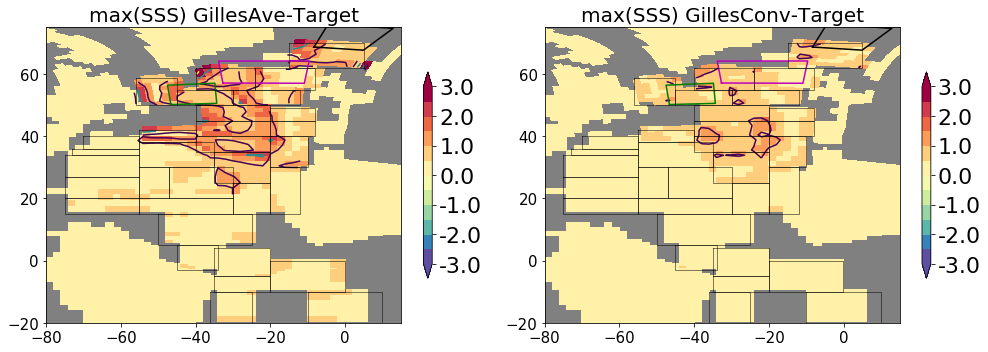

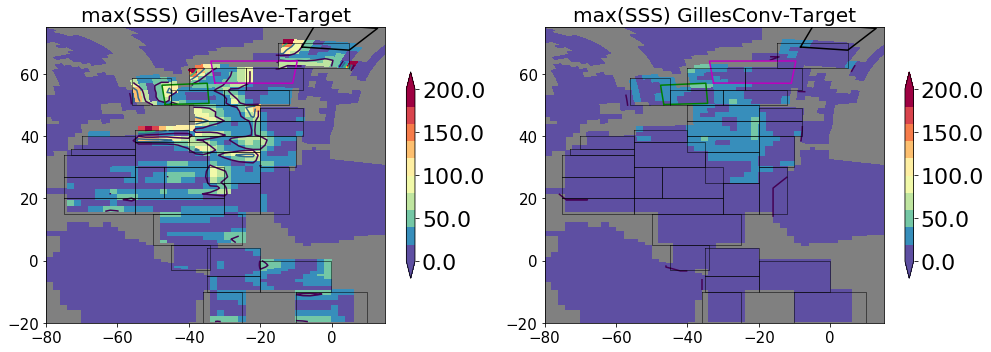

In [17]:
################################################### Other plot
plt.close()
#create your figure
fig, axes = plt.subplots(1,2,figsize=(14,5))
# range of values for the colorbar
range_data = np.array(np.arange(-3,3.1,0.5))
ticks_data = np.array(np.arange(-3,3.1,1))
levels = range_data#MaxNLocator(nbins=8).tick_values(ticks_data.min(), ticks_data.max())
# color scale of the plot
cmap = plt.cm.Spectral_r
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# chosen data
data2=np.abs(sss_Gilles[:,:,:]-sss_FullRes[:,:,:])
data = ma.max(data2, axis=0)
#background in grey
axes[0].patch.set_facecolor('grey')
#colormesh the data
cs00=axes[0].pcolormesh( lon_2[:,:],lat_2[:,:], data[:,:],cmap=cmap, norm=norm)
# plot the colorbar
cb = plt.colorbar(cs00,extend='both',extendfrac='auto',ax=axes[0], shrink=.7, aspect=20)
#axes.contour(data[:,:], np.arange(30,39,2), linewidths = 0.5, colors = 'k')
# features of the colorbar
cb.set_ticks(ticks_data)
cb.set_ticklabels(ticks_data)
cb.ax.tick_params(labelsize=22)
#control the size of the labels in the axes
axes[0].tick_params(axis='y', labelsize=15)
axes[0].tick_params(axis='x', labelsize=15)
#axes[0].set_ylim((lat_bnds[0]-20,lat_bnds[0]+20,))
#axes[0].set_xlim((lon_bnds[0]-20, lon_bnds[1]+20))
# title of the plot
axes[0].set_title(r'max(SSS) GillesAve-Target' , fontsize=20)
#axes[0,0].plot(lonss,latss, color = 'k', lw=2 )
#limit the axes
axes[0].set_xlim((-80,15))
axes[0].set_ylim((-20,75))
axes[0].contour(lon_2[:,:],lat_2[:,:],data[:,:],levels=np.arange(-3,3.1,1))
#plot the convective regions in the model: Labrador Sea, South Iceland and Greenland Sea (Svalvard)
axes[0].plot([lon[110,118],lon[110,124],lon[115,124],lon[115,118],lon[110,118]],
          [lat[110,118],lat[110,124],lat[115,124],lat[115,118],lat[110,118]], color='g', label = 'LS')

#axes.plot([24,29,29,24,24],[45,45,52,52,45], color='g', label = 'Ir')
axes[0].plot([lon[115,125],lon[115,135],lon[121,135],lon[121,125],lon[115,125]],
          [lat[115,125],lat[115,135],lat[121,135],lat[121,125],lat[115,125]],color='m', label = 'SI')
#    [25,35,35,25,25],[45,45,51,51,45], 
#axes.plot([35,40,40,35,35],[55,55,62,62,55], color='k', label = 'Sv')
axes[0].plot([lon[125,135],lon[125,140],lon[132,140],lon[132,135],lon[125,135]],
          [lat[125,135],lat[125,140],lat[132,140],lat[132,135],lat[125,135]],color='k', label = 'Sv')


# repeat for the other plot


levels = range_data#MaxNLocator(nbins=8).tick_values(ticks_data.min(), ticks_data.max())
# color scale of the plot
cmap = plt.cm.Spectral_r
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
levels = range_data#MaxNLocator(nbins=8).tick_values(ticks_data.min(), ticks_data.max())
cmap = plt.cm.Spectral_r
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

data2=np.abs(sss_Conv[:,:,:]-sss_FullRes[:,:,:])
data = ma.max(data2, axis=0)
axes[1].patch.set_facecolor('grey')
cs00=axes[1].pcolormesh(lon_2[:,:],lat_2[:,:],data[:,:],cmap=cmap, norm=norm)
axes[1].contour(lon_2[:,:],lat_2[:,:],data[:,:],levels=np.arange(-3,3.1,1))
cb = plt.colorbar(cs00,extend='both',extendfrac='auto',ax=axes[1], shrink=.7, aspect=20)
#axes.contour(data[:,:], np.arange(30,39,2), linewidths = 0.5, colors = 'k')
cb.set_ticks(ticks_data)
cb.set_ticklabels(ticks_data)
cb.ax.tick_params(labelsize=22)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_title('max(SSS) GillesConv-Target' , fontsize=20)
axes[1].set_xlim((-80,15))
axes[1].set_ylim((-20,75))
#axes[0,1].plot(lonss,latss, color = 'k', lw=2 )
axes[1].plot([lon[110,118],lon[110,124],lon[115,124],lon[115,118],lon[110,118]],
          [lat[110,118],lat[110,124],lat[115,124],lat[115,118],lat[110,118]], color='g', label = 'LS')

#axes.plot([24,29,29,24,24],[45,45,52,52,45], color='g', label = 'Ir')
axes[1].plot([lon[115,125],lon[115,135],lon[121,135],lon[121,125],lon[115,125]],
          [lat[115,125],lat[115,135],lat[121,135],lat[121,125],lat[115,125]],color='m', label = 'SI')
#    [25,35,35,25,25],[45,45,51,51,45], 
#axes.plot([35,40,40,35,35],[55,55,62,62,55], color='k', label = 'Sv')
axes[1].plot([lon[125,135],lon[125,140],lon[132,140],lon[132,135],lon[125,135]],
          [lat[125,135],lat[125,140],lat[132,140],lat[132,135],lat[125,135]],color='k', label = 'Sv')



for l in range(32): # For each grid_box
    
    
    
    lat_bnds, lon_bnds = [Gilles_Grid[l,5], Gilles_Grid[l,3]], [Gilles_Grid[l,0], Gilles_Grid[l,2]]
    
    latss = [Gilles_Grid[l,3],Gilles_Grid[l,3], Gilles_Grid[l,5], Gilles_Grid[l,5],Gilles_Grid[l,3]]
    lonss = [Gilles_Grid[l,0], Gilles_Grid[l,2], Gilles_Grid[l,2],Gilles_Grid[l,0],Gilles_Grid[l,0]]

    
    # Variance explained
    axes[0].plot(lonss,latss, color ='k', lw=0.5 )
    axes[1].plot(lonss,latss, color ='k', lw=0.5 )  


plt.tight_layout()    
plt.show() 
################################################### Other plot
plt.close()
#create your figure
fig, axes = plt.subplots(1,2,figsize=(14,5))
# range of values for the colorbar
range_data = np.array(np.arange(0,200.1,20))
ticks_data = np.array(np.arange(0,200.1,50))
levels = range_data#MaxNLocator(nbins=8).tick_values(ticks_data.min(), ticks_data.max())
# color scale of the plot
cmap = plt.cm.Spectral_r
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# chosen data
data2=np.abs(sss_Gilles[:,:,:]-sss_FullRes[:,:,:])
data = ma.sum(data2, axis=0)
#background in grey
axes[0].patch.set_facecolor('grey')
#colormesh the data
cs00=axes[0].pcolormesh( lon_2[:,:],lat_2[:,:], data[:,:],cmap=cmap, norm=norm)
# plot the colorbar
cb = plt.colorbar(cs00,extend='both',extendfrac='auto',ax=axes[0], shrink=.7, aspect=20)
#axes.contour(data[:,:], np.arange(30,39,2), linewidths = 0.5, colors = 'k')
# features of the colorbar
cb.set_ticks(ticks_data)
cb.set_ticklabels(ticks_data)
cb.ax.tick_params(labelsize=22)
#control the size of the labels in the axes
axes[0].tick_params(axis='y', labelsize=15)
axes[0].tick_params(axis='x', labelsize=15)
#axes[0].set_ylim((lat_bnds[0]-20,lat_bnds[0]+20,))
#axes[0].set_xlim((lon_bnds[0]-20, lon_bnds[1]+20))
# title of the plot
axes[0].set_title(r'max(SSS) GillesAve-Target' , fontsize=20)
#axes[0,0].plot(lonss,latss, color = 'k', lw=2 )
#limit the axes
axes[0].set_xlim((-80,15))
axes[0].set_ylim((-20,75))
axes[0].contour(lon_2[:,:],lat_2[:,:],data[:,:],levels=ticks_data)
#plot the convective regions in the model: Labrador Sea, South Iceland and Greenland Sea (Svalvard)
axes[0].plot([lon[110,118],lon[110,124],lon[115,124],lon[115,118],lon[110,118]],
          [lat[110,118],lat[110,124],lat[115,124],lat[115,118],lat[110,118]], color='g', label = 'LS')

#axes.plot([24,29,29,24,24],[45,45,52,52,45], color='g', label = 'Ir')
axes[0].plot([lon[115,125],lon[115,135],lon[121,135],lon[121,125],lon[115,125]],
          [lat[115,125],lat[115,135],lat[121,135],lat[121,125],lat[115,125]],color='m', label = 'SI')
#    [25,35,35,25,25],[45,45,51,51,45], 
#axes.plot([35,40,40,35,35],[55,55,62,62,55], color='k', label = 'Sv')
axes[0].plot([lon[125,135],lon[125,140],lon[132,140],lon[132,135],lon[125,135]],
          [lat[125,135],lat[125,140],lat[132,140],lat[132,135],lat[125,135]],color='k', label = 'Sv')


# repeat for the other plot


levels = range_data#MaxNLocator(nbins=8).tick_values(ticks_data.min(), ticks_data.max())
# color scale of the plot
cmap = plt.cm.Spectral_r
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
levels = range_data#MaxNLocator(nbins=8).tick_values(ticks_data.min(), ticks_data.max())
cmap = plt.cm.Spectral_r
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

data2=np.abs(sss_Conv[:,:,:]-sss_FullRes[:,:,:])
data = ma.sum(data2, axis=0)
axes[1].patch.set_facecolor('grey')
cs00=axes[1].pcolormesh(lon_2[:,:],lat_2[:,:],data[:,:],cmap=cmap, norm=norm)
axes[1].contour(lon_2[:,:],lat_2[:,:],data[:,:],levels=ticks_data)
cb = plt.colorbar(cs00,extend='both',extendfrac='auto',ax=axes[1], shrink=.7, aspect=20)
#axes.contour(data[:,:], np.arange(30,39,2), linewidths = 0.5, colors = 'k')
cb.set_ticks(ticks_data)
cb.set_ticklabels(ticks_data)
cb.ax.tick_params(labelsize=22)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_title('max(SSS) GillesConv-Target' , fontsize=20)
axes[1].set_xlim((-80,15))
axes[1].set_ylim((-20,75))
#axes[0,1].plot(lonss,latss, color = 'k', lw=2 )
axes[1].plot([lon[110,118],lon[110,124],lon[115,124],lon[115,118],lon[110,118]],
          [lat[110,118],lat[110,124],lat[115,124],lat[115,118],lat[110,118]], color='g', label = 'LS')

#axes.plot([24,29,29,24,24],[45,45,52,52,45], color='g', label = 'Ir')
axes[1].plot([lon[115,125],lon[115,135],lon[121,135],lon[121,125],lon[115,125]],
          [lat[115,125],lat[115,135],lat[121,135],lat[121,125],lat[115,125]],color='m', label = 'SI')
#    [25,35,35,25,25],[45,45,51,51,45], 
#axes.plot([35,40,40,35,35],[55,55,62,62,55], color='k', label = 'Sv')
axes[1].plot([lon[125,135],lon[125,140],lon[132,140],lon[132,135],lon[125,135]],
          [lat[125,135],lat[125,140],lat[132,140],lat[132,135],lat[125,135]],color='k', label = 'Sv')



for l in range(32): # For each grid_box
    
    
    
    lat_bnds, lon_bnds = [Gilles_Grid[l,5], Gilles_Grid[l,3]], [Gilles_Grid[l,0], Gilles_Grid[l,2]]
    
    latss = [Gilles_Grid[l,3],Gilles_Grid[l,3], Gilles_Grid[l,5], Gilles_Grid[l,5],Gilles_Grid[l,3]]
    lonss = [Gilles_Grid[l,0], Gilles_Grid[l,2], Gilles_Grid[l,2],Gilles_Grid[l,0],Gilles_Grid[l,0]]

    
    # Variance explained
    axes[0].plot(lonss,latss, color ='k', lw=0.5 )
    axes[1].plot(lonss,latss, color ='k', lw=0.5 )  


plt.tight_layout()    
plt.show() 

# 2. Insights from heat fluxes & corrections

In [11]:
dir1 = '/ccc/store/cont003/thredds/estellav/GillesData'
os.chdir(dir1)

file2read1 = Dataset('sosaline_GillesAve_All.nc','r')
#tab = np.array(file2read1.variables['sos'][:,100:140,110:145])
tab = np.array(file2read1.variables['sos'][:,:,100:145])
lon = np.array(file2read1.variables['nav_lon'])
lat = np.array(file2read1.variables['nav_lat'])
lon_2 = np.array(file2read1.variables['nav_lon'][:,100:145])
lat_2 = np.array(file2read1.variables['nav_lat'][:,100:145])
lon_1 = np.array(file2read1.variables['nav_lon'][100:140,100:145])
lat_1 = np.array(file2read1.variables['nav_lat'][100:140,100:145])

## 2.1 wfcorr

/home/vestella/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


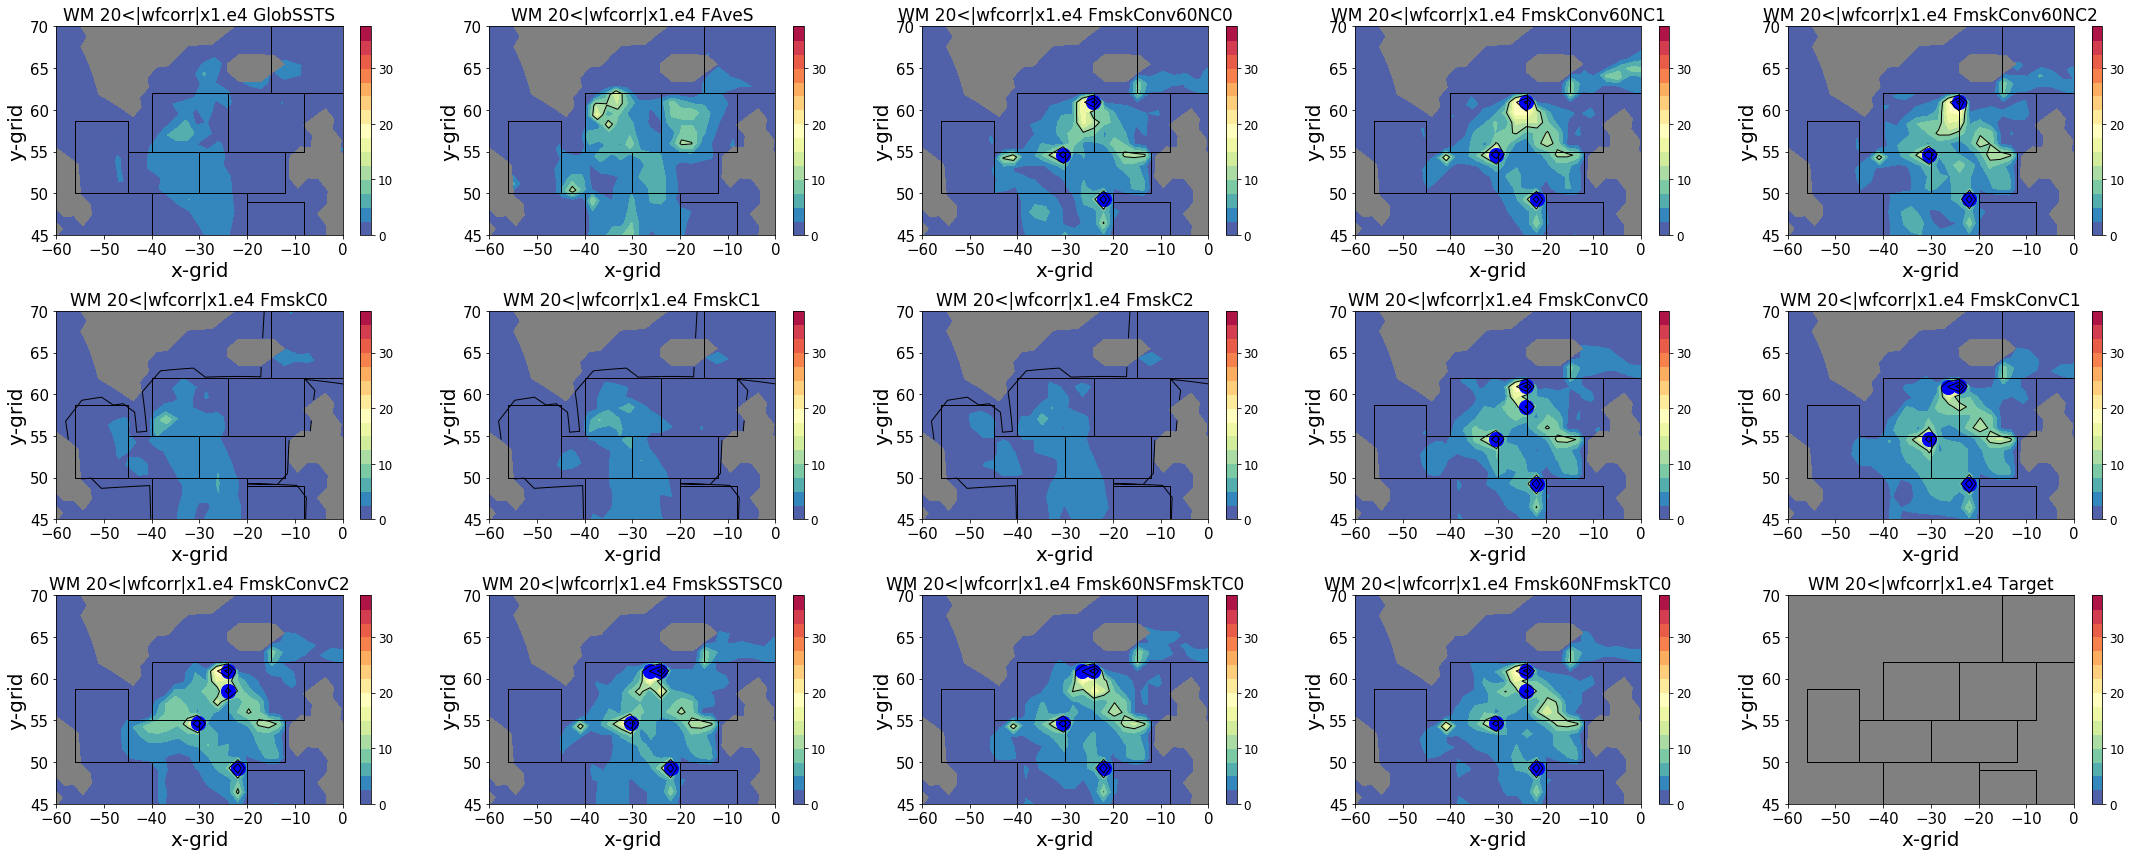

In [8]:
# MEan states
range_mld = np.array(np.arange(0,40,2.5))
ticks_mld = np.array(np.arange(0,40,10))

plt.close()

imodel=ntarget


dir1 = '/ccc/store/cont003/thredds/estellav/Bining'
os.chdir(dir1)


plt.close()
fig, axes = plt.subplots(3,5,figsize=(30,12))

i=-1
j=0
    
for imodel in range(1,nmodels):
    
    i=i+1
    if i==5:
        i=0
        j=j+1


    f = Dataset(Models[imodel]['name']+'_55600101_56591231_1M_wfcorr.nc','r')
    tab=np.array(f.variables['wfcorr'][Models[imodel]['ts0']:Models[imodel]['ts1'],100:140,100:145])
    mask_tab=np.zeros((tab.shape[0],tab.shape[1],tab.shape[2]))
    mask_tab[ma.where(tab>1.e10)]=1.   
    tab_masked=ma.masked_where(mask_tab ==1., tab)
    tab_masked_temp=np.reshape(tab_masked,(12,tab_masked.shape[0]/12,tab_masked.shape[1],tab_masked.shape[2]),order='F')
    tos_target = tab_masked_temp[11,:,:,:]/3
    tos_target=tos_target + ma.sum(tab_masked_temp[:2,:,:,:],axis=0)/3
    
    # mean
    mean=ma.max(ma.abs(tos_target),axis=0)*1.e4


    cs00=axes[j,i].contourf(lon[100:140,100:145],lat[100:140,100:145],mean, levels=range_mld, cmap=plt.cm.Spectral_r)
    axes[j,i].set_title(r'WM 20<|wfcorr|x1.e4 ' +Models[imodel]['label'] , fontsize=17)
    axes[j,i].set_xlabel("x-grid", fontsize=20)
    axes[j,i].set_ylabel("y-grid", fontsize=20)
    axes[j,i].tick_params(axis='y', labelsize=15)
    axes[j,i].tick_params(axis='x', labelsize=15)
    axes[j,i].patch.set_facecolor('grey')
    cbar00 = plt.colorbar(cs00,ax=axes[j,i],values = range_mld)
    cbar00.ax.tick_params(labelsize=12)
    cbar00.set_ticks(ticks_mld)
    cbar00.set_ticklabels(ticks_mld)
    axes[j,i].contour(lon[100:140,100:145],lat[100:140,100:145],mean, levels=ticks_mld, linewidths=1, colors='k')
    axes[j,i].set_xlim((-60,0))
    axes[j,i].set_ylim((45,70))
    #axes[j,i].axhline(y=60, color='m', lw=3)
    
    '''axes[i].plot([lon[109,116],lon[109,124],lon[115,124],lon[115,116],lon[109,116]],
          [lat[109,118],lat[109,124],lat[115,124],lat[115,116],lat[109,116]], color='g', label = 'LS', lw=4)

    axes[i].plot([lon[115,125],lon[115,135],lon[121,135],lon[121,125],lon[115,125]],
          [lat[115,125],lat[115,135],lat[121,135],lat[121,125],lat[115,125]],color='m', label = 'SI', lw=4)

    axes[i].plot([lon[125,135],lon[125,140],lon[132,140],lon[132,135],lon[125,135]],
          [lat[125,135],lat[125,140],lat[132,140],lat[132,135],lat[125,135]],color='k', label = 'Sv', lw=4)
    '''
    
    for l in range(32): # For each grid_box



        lat_bnds, lon_bnds = [Gilles_Grid[l,5], Gilles_Grid[l,3]], [Gilles_Grid[l,0], Gilles_Grid[l,2]]

        latss = [Gilles_Grid[l,3],Gilles_Grid[l,3], Gilles_Grid[l,5], Gilles_Grid[l,5],Gilles_Grid[l,3]]
        lonss = [Gilles_Grid[l,0], Gilles_Grid[l,2], Gilles_Grid[l,2],Gilles_Grid[l,0],Gilles_Grid[l,0]]


        # Variance explained
        axes[j,i].plot(lonss,latss, color ='k', lw=1 )
        
    axes[j,i].scatter(lon_1[np.where((mean>20)& (mean<10000))],lat_1[np.where((mean>20)& (mean<10000))], c='blue', s=200)


plt.tight_layout()    
plt.show()

The points where we get extreme values of hfcorr are located in the intersections or boundaries of FDS boxes. They appear only when convoluted SSS is considered. They don't appear whith ful resolution of SSS (three on the left in 2nd column) or even with the averaged SSS. 

# 2.2 hfcorr

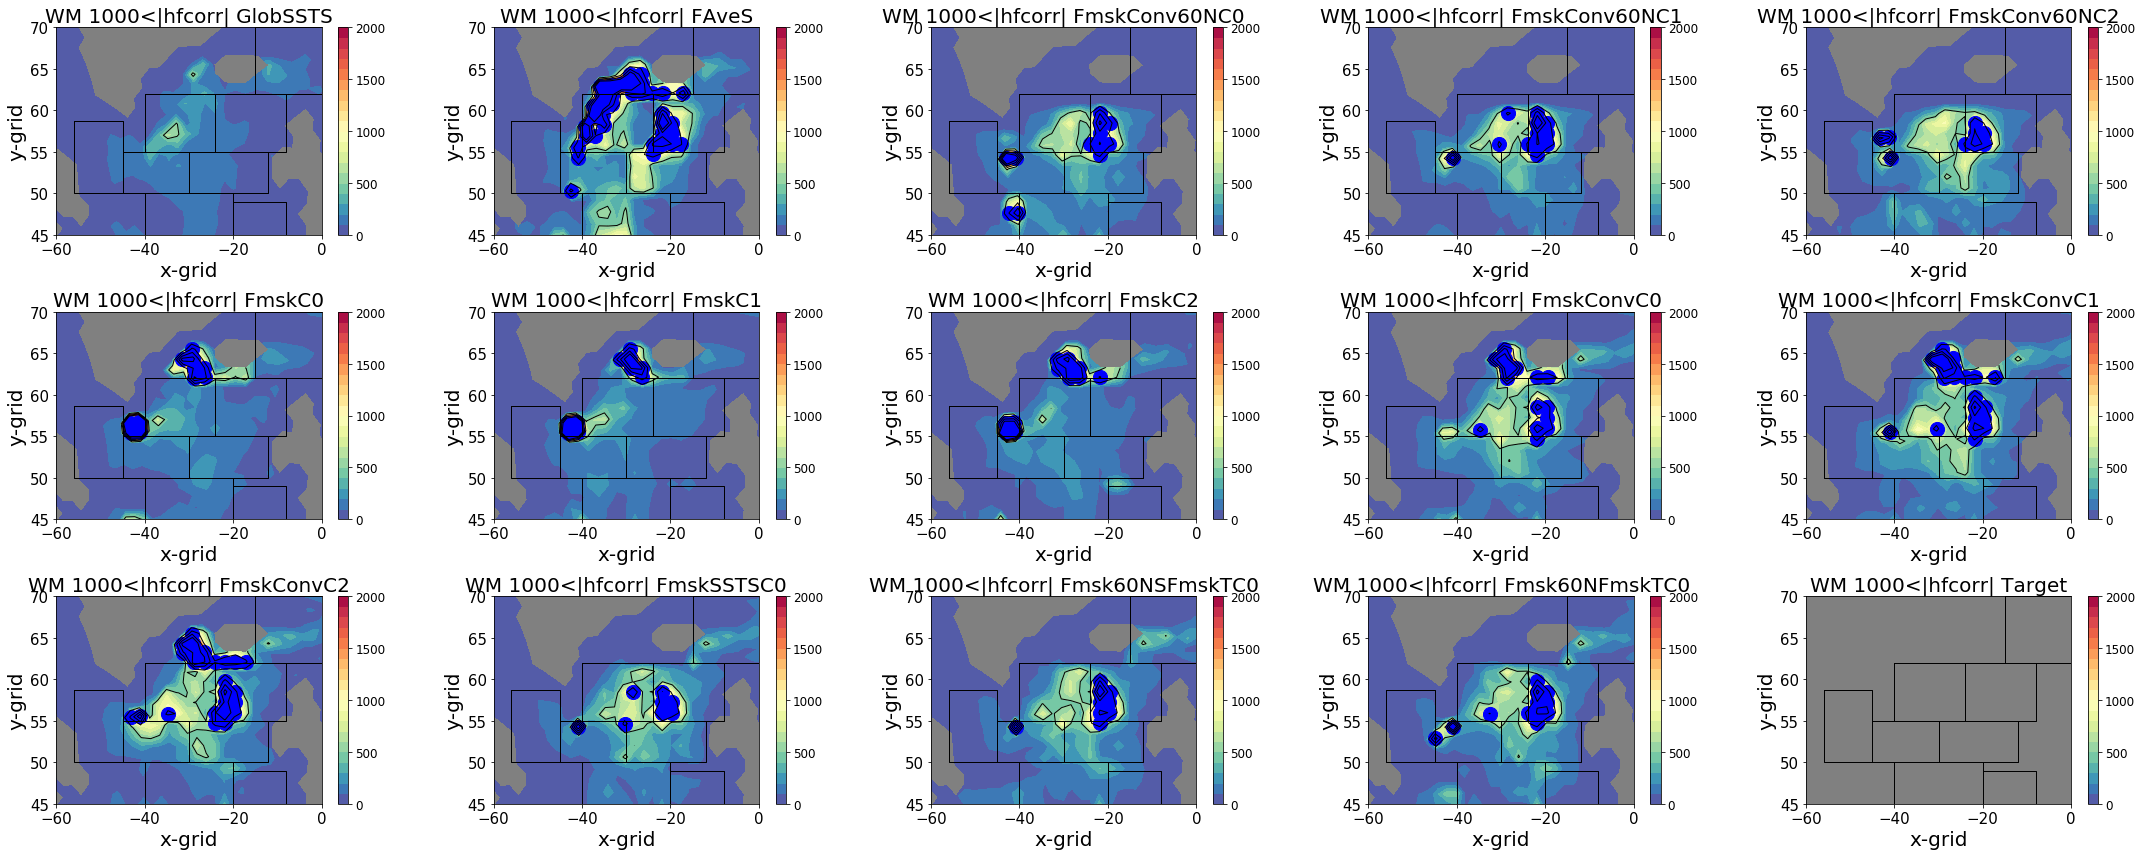

In [13]:
# MEan states
range_mld = np.array(np.arange(0,2001,100))
ticks_mld = np.array(np.arange(0,2001,500))

plt.close()

imodel=ntarget


dir1 = '/ccc/store/cont003/thredds/estellav/Bining'
os.chdir(dir1)


plt.close()
fig, axes = plt.subplots(3,5,figsize=(30,12))

i=-1
j=0
    
for imodel in range(1,nmodels):
    
    i=i+1
    if i==5:
        i=0
        j=j+1


    f = Dataset(Models[imodel]['name']+'_55600101_56591231_1M_hfcorr.nc','r')
    tab=np.array(f.variables['hfcorr'][Models[imodel]['ts0']:Models[imodel]['ts1'],100:140,100:145])
    mask_tab=np.zeros((tab.shape[0],tab.shape[1],tab.shape[2]))
    mask_tab[ma.where(tab>1.e10)]=1.   
    tab_masked=ma.masked_where(mask_tab ==1., tab)
    tab_masked_temp=np.reshape(tab_masked,(12,tab_masked.shape[0]/12,tab_masked.shape[1],tab_masked.shape[2]),order='F')
    tos_target = tab_masked_temp[11,:,:,:]/3
    tos_target=tos_target + ma.sum(tab_masked_temp[:2,:,:,:],axis=0)/3
    
    # mean
    mean=ma.max(ma.abs(tos_target),axis=0)

    cs00=axes[j,i].contourf(lon[100:140,100:145],lat[100:140,100:145],mean, levels=range_mld, cmap=plt.cm.Spectral_r)
    axes[j,i].set_title(r'WM 1000<|hfcorr| ' +Models[imodel]['label'] , fontsize=20)
    axes[j,i].set_xlabel("x-grid", fontsize=20)
    axes[j,i].set_ylabel("y-grid", fontsize=20)
    axes[j,i].tick_params(axis='y', labelsize=15)
    axes[j,i].tick_params(axis='x', labelsize=15)
    axes[j,i].patch.set_facecolor('grey')
    cbar00 = plt.colorbar(cs00,ax=axes[j,i],values = range_mld)
    cbar00.ax.tick_params(labelsize=12)
    cbar00.set_ticks(ticks_mld)
    cbar00.set_ticklabels(ticks_mld)
    axes[j,i].contour(lon[100:140,100:145],lat[100:140,100:145],mean, levels=ticks_mld, linewidths=1, colors='k')
    axes[j,i].set_xlim((-60,0))
    axes[j,i].set_ylim((45,70))
    #axes[j,i].axhline(y=60, color='m', lw=3)
    
    '''axes[i].plot([lon[109,116],lon[109,124],lon[115,124],lon[115,116],lon[109,116]],
          [lat[109,118],lat[109,124],lat[115,124],lat[115,116],lat[109,116]], color='g', label = 'LS', lw=4)

    axes[i].plot([lon[115,125],lon[115,135],lon[121,135],lon[121,125],lon[115,125]],
          [lat[115,125],lat[115,135],lat[121,135],lat[121,125],lat[115,125]],color='m', label = 'SI', lw=4)

    axes[i].plot([lon[125,135],lon[125,140],lon[132,140],lon[132,135],lon[125,135]],
          [lat[125,135],lat[125,140],lat[132,140],lat[132,135],lat[125,135]],color='k', label = 'Sv', lw=4)
    '''
    
    for l in range(32): # For each grid_box



        lat_bnds, lon_bnds = [Gilles_Grid[l,5], Gilles_Grid[l,3]], [Gilles_Grid[l,0], Gilles_Grid[l,2]]

        latss = [Gilles_Grid[l,3],Gilles_Grid[l,3], Gilles_Grid[l,5], Gilles_Grid[l,5],Gilles_Grid[l,3]]
        lonss = [Gilles_Grid[l,0], Gilles_Grid[l,2], Gilles_Grid[l,2],Gilles_Grid[l,0],Gilles_Grid[l,0]]


        # Variance explained
        axes[j,i].plot(lonss,latss, color ='k', lw=1 )
        
    axes[j,i].scatter(lon_1[np.where((mean>1000)& (mean<10000))],lat_1[np.where((mean>1000)& (mean<10000))], c='blue', s=200)


plt.tight_layout()    
plt.show()


In blue are shown the gridpoints whose maximal absolute value of hfcorr has exceeded the value of 1000 in the 100 years of run. 

-> In the convoluted ones (3 on top right, two on right in the middle, and four on left at bottom), there is always strong heat fluxes in the box south of Iceland, south of Greenland in the regions between the boxes and in the corner of one of them, and some outside the FDS mask for the ones nudging SST above 60N or outside the mask (FmskConv)

--> The differences between SST nudging everywhere (FmskConv, the ones overshooting) and the ones restricting the SST nudging is that we are missing the region of strong heat corrections east of Iceland.

--> When nudging only SSS in the FDS mask and SST everywhere (Fmsk) there are strong heat fluxes in the east of Iceland and in the region between the three boxes in the Greenland region. 

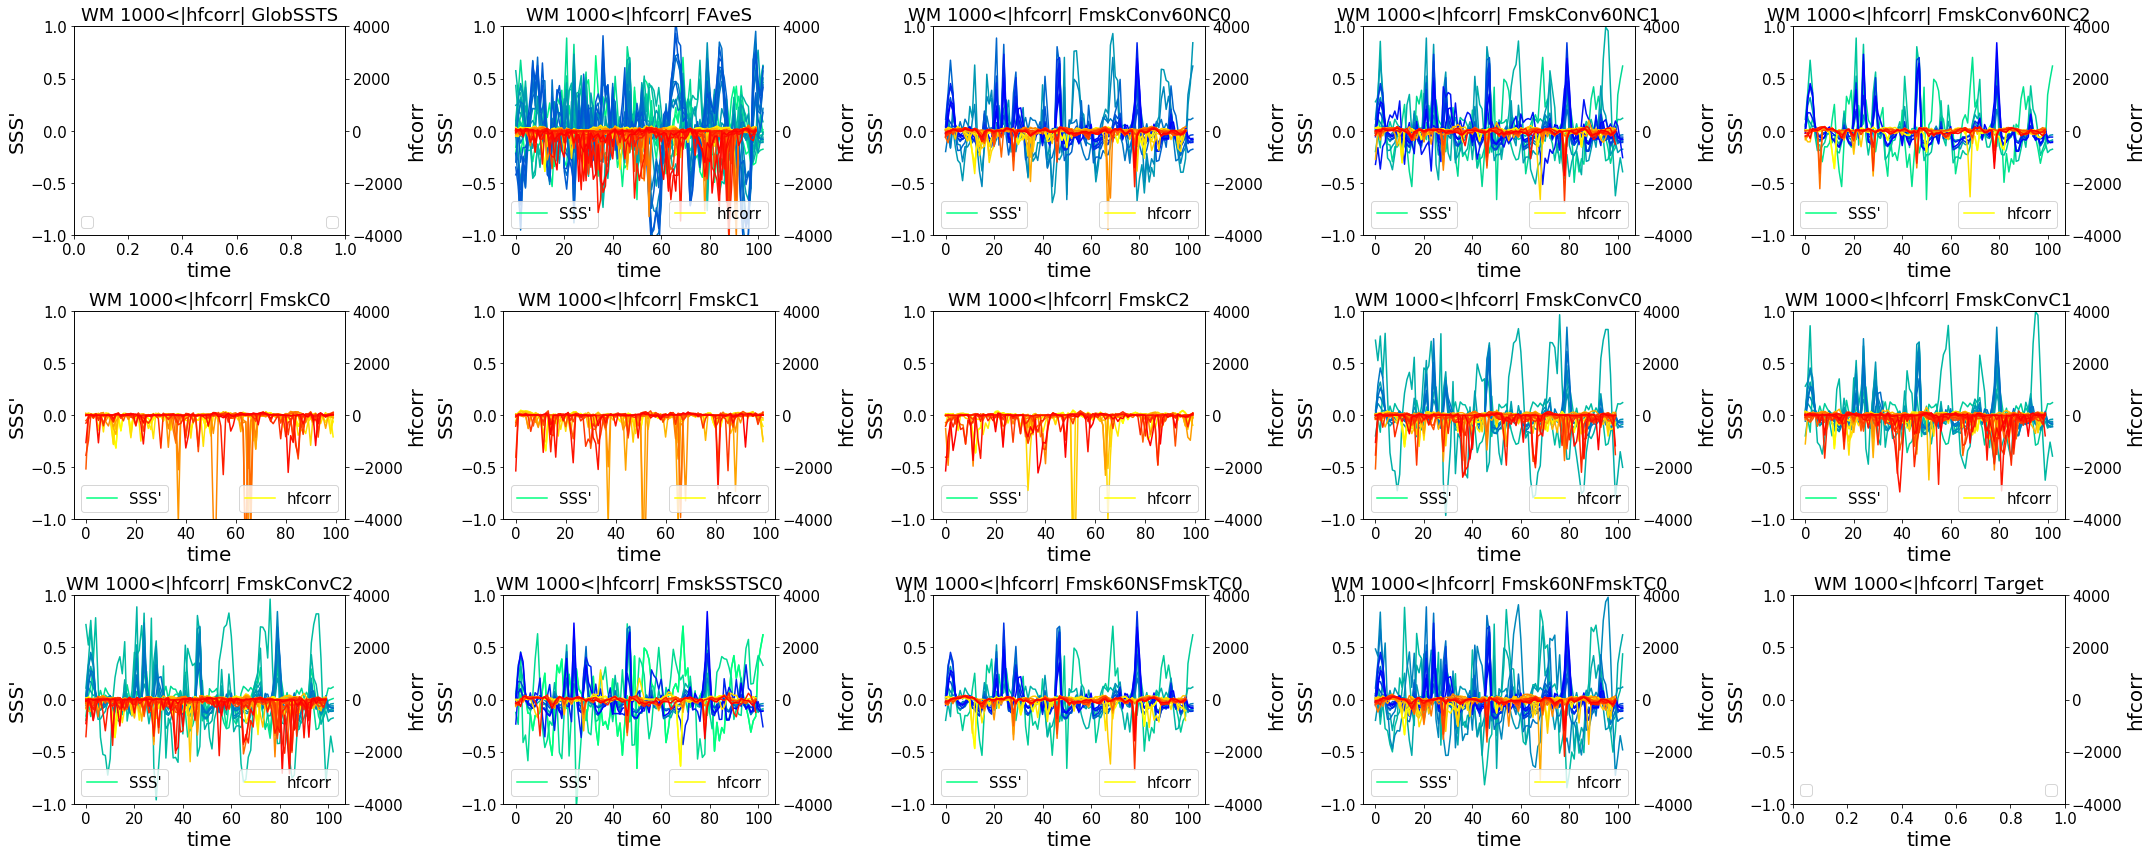

In [16]:
plt.close()
fig, axes = plt.subplots(3,5,figsize=(30,12))
i=-1
j=0
dir1 = '/ccc/store/cont003/thredds/estellav/Bining'
os.chdir(dir1)

for imodel in range(1,nmodels):
    
    i=i+1
    if i==5:
        i=0
        j=j+1



    f = Dataset(Models[imodel]['name']+'_55600101_56591231_1M_hfcorr.nc','r')
    tab=np.array(f.variables['hfcorr'][Models[imodel]['ts0']:Models[imodel]['ts1'],100:140,100:145])
    mask_tab=np.zeros((tab.shape[0],tab.shape[1],tab.shape[2]))
    mask_tab[ma.where(tab>1.e10)]=1.   
    tab_masked=ma.masked_where(mask_tab ==1., tab)
    tab_masked_temp=np.reshape(tab_masked,(12,tab_masked.shape[0]/12,tab_masked.shape[1],tab_masked.shape[2]),order='F')
    tos_target = tab_masked_temp[11,:,:,:]/3
    tos_target=tos_target + ma.sum(tab_masked_temp[:2,:,:,:],axis=0)/3
    
    ax1=axes[j,i].twinx()
    # mean
    mean=ma.max(np.abs(tos_target),axis=0)
    c=np.where((mean>1000)&(mean<10000))
    if len(c[0])!=0:
        colors_r = plt.cm.autumn_r(np.linspace(0, 1,len(c[0])))
        colors_g = plt.cm.winter_r(np.linspace(0, 1,len(c[0])))
        for k in range(len(c[0])):
            if k==0:
                ax1.plot(tos_target[:,c[0][k],c[1][k]], color=colors_r[k], label ='hfcorr')
                axes[j,i].plot(sss_Conv[:,c[0][k]+100,c[1][k]]-sss_FullRes[:,c[0][k]+100,c[1][k]], color=colors_g[k], label ="SSS'")            
            axes[j,i].plot(sss_Conv[:,c[0][k]+100,c[1][k]]-sss_FullRes[:,c[0][k]+100,c[1][k]], color=colors_g[k])
        for k in range(len(c[0])):
            ax1.plot(tos_target[:,c[0][k],c[1][k]],color=colors_r[k])
    
    axes[j,i].set_title(r'WM 1000<|hfcorr| ' +Models[imodel]['label'] , fontsize=18)
    axes[j,i].set_xlabel("time", fontsize=20)
    axes[j,i].set_ylabel("SSS'", fontsize=20)
    axes[j,i].tick_params(axis='y', labelsize=15)
    axes[j,i].tick_params(axis='x', labelsize=15)
    axes[j,i].legend(loc=3, fontsize=15,ncol=3)
    axes[j,i].set_ylim((-1.0,1.0))
    ax1.legend(loc=4, fontsize=15,ncol=3)
    ax1.set_xlabel("time", fontsize=20)
    ax1.set_ylabel("hfcorr", fontsize=20)
    ax1.tick_params(axis='y', labelsize=15)
    ax1.tick_params(axis='x', labelsize=15)
    ax1.set_ylim((-4000,4000))

plt.tight_layout()    
plt.show()    


Here is shown the SSS anomalies in the input in gree-blue colors and hfcorr anomalies for the points shown in the previous plot whose absolute value of hfcorr is higher than 1000. 

--> I can't see a 1 to 1 relation between SSS anomalies and high peaks in the hfcorr

# 2.3 hfds

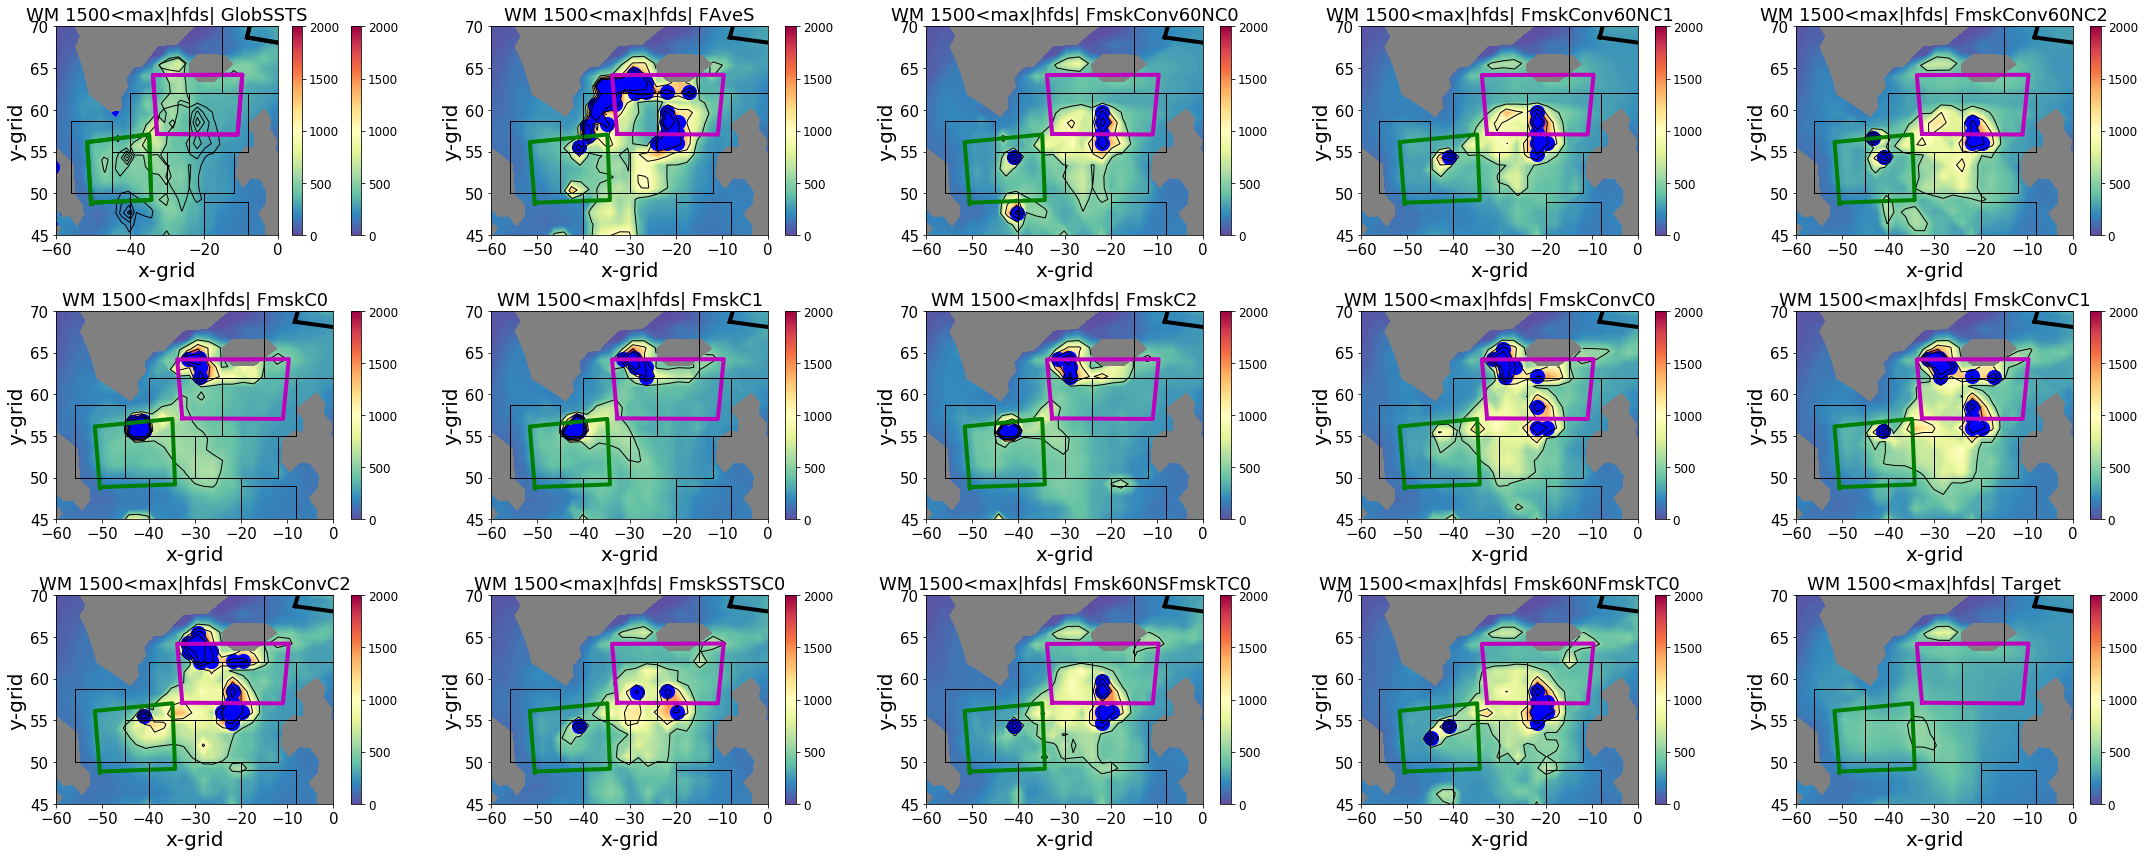

In [20]:
# MEan states
range_mld = np.array(np.arange(0,2001,10))
ticks_mld = np.array(np.arange(0,2001,500))

plt.close()

imodel=3


dir1 = '/ccc/store/cont003/thredds/estellav/Bining'
os.chdir(dir1)


f = Dataset(Models[imodel]['name']+'_55600101_56591231_1M_hfds.nc','r')
tab=np.array(f.variables['hfds'][Models[imodel]['ts0']:Models[imodel]['ts1'],100:140,110:145])
mask_tab=np.zeros((tab.shape[0],tab.shape[1],tab.shape[2]))
mask_tab[ma.where(tab>1.e10)]=1.   
tab_masked=ma.masked_where(mask_tab ==1., tab)
tab_masked_temp=np.reshape(tab_masked,(12,tab_masked.shape[0]/12,tab_masked.shape[1],tab_masked.shape[2]),order='F')
tos_target = tab_masked_temp[11,:,:,:]/3
tos_target=tos_target + ma.sum(tab_masked_temp[:2,:,:,:],axis=0)/3


plt.close()
fig, axes = plt.subplots(3,5,figsize=(30,12))
i=0
j=0

# mean
mean_target=ma.max(np.abs(tos_target),axis=0)
    
cs00=axes[j,i].contourf(lon[100:140,110:145],lat[100:140,110:145],mean_target, levels=range_mld, cmap=plt.cm.Spectral_r)
axes[j,i].set_title(r'WM hfds>1500 ' +Models[imodel]['label'] , fontsize=20)
axes[j,i].set_xlabel("x-grid", fontsize=20)
axes[j,i].set_ylabel("y-grid", fontsize=20)
axes[j,i].tick_params(axis='y', labelsize=15)
axes[j,i].tick_params(axis='x', labelsize=15)
axes[j,i].patch.set_facecolor('grey')
cbar00 = plt.colorbar(cs00,ax=axes[j,i],values = range_mld)
cbar00.ax.tick_params(labelsize=12)
cbar00.set_ticks(ticks_mld)
cbar00.set_ticklabels(ticks_mld)
axes[j,i].contour(lon[100:140,110:145],lat[100:140,110:145],mean_target, levels=ticks_mld, linewidths=1, colors='k')
axes[j,i].set_xlim((-60,0))
axes[j,i].set_ylim((45,70))
axes[j,i].scatter(lon_1[np.where((mean_target>1500)&(mean_target<10000))],lat_1[np.where((mean_target>1500)&(mean_target<10000))], c='blue', s=200)

#axes[j,i].axhline(y=60, color='m', lw=3)

axes[j,i].plot([lon[109,116],lon[109,124],lon[115,124],lon[115,116],lon[109,116]],
      [lat[109,118],lat[109,124],lat[115,124],lat[115,116],lat[109,116]], color='g', label = 'LS', lw=4)

axes[j,i].plot([lon[115,125],lon[115,135],lon[121,135],lon[121,125],lon[115,125]],
      [lat[115,125],lat[115,135],lat[121,135],lat[121,125],lat[115,125]],color='m', label = 'SI', lw=4)

axes[j,i].plot([lon[125,135],lon[125,140],lon[132,140],lon[132,135],lon[125,135]],
      [lat[125,135],lat[125,140],lat[132,140],lat[132,135],lat[125,135]],color='k', label = 'Sv', lw=4)

for l in range(32): # For each grid_box



    lat_bnds, lon_bnds = [Gilles_Grid[l,5], Gilles_Grid[l,3]], [Gilles_Grid[l,0], Gilles_Grid[l,2]]

    latss = [Gilles_Grid[l,3],Gilles_Grid[l,3], Gilles_Grid[l,5], Gilles_Grid[l,5],Gilles_Grid[l,3]]
    lonss = [Gilles_Grid[l,0], Gilles_Grid[l,2], Gilles_Grid[l,2],Gilles_Grid[l,0],Gilles_Grid[l,0]]


    # Variance explained
    axes[j,i].plot(lonss,latss, color ='k', lw=1 )
i=-1    
    
for imodel in range(1,nmodels):
    
    i=i+1
    if i==5:
        i=0
        j=j+1




    f = Dataset(Models[imodel]['name']+'_55600101_56591231_1M_hfds.nc','r')
    tab=np.array(f.variables['hfds'][Models[imodel]['ts0']:Models[imodel]['ts1'],100:140,100:145])
    mask_tab=np.zeros((tab.shape[0],tab.shape[1],tab.shape[2]))
    mask_tab[ma.where(tab>1.e10)]=1.   
    tab_masked=ma.masked_where(mask_tab ==1., tab)
    tab_masked_temp=np.reshape(tab_masked,(12,tab_masked.shape[0]/12,tab_masked.shape[1],tab_masked.shape[2]),order='F')
    tos_target = tab_masked_temp[11,:,:,:]/3
    tos_target=tos_target + ma.sum(tab_masked_temp[:2,:,:,:],axis=0)/3
    
    # mean
    mean=ma.max(np.abs(tos_target),axis=0)

    cs00=axes[j,i].contourf(lon[100:140,100:145],lat[100:140,100:145],mean, levels=range_mld, cmap=plt.cm.Spectral_r)
    axes[j,i].set_title(r'WM 1500<max|hfds| ' +Models[imodel]['label'] , fontsize=18)
    axes[j,i].set_xlabel("x-grid", fontsize=20)
    axes[j,i].set_ylabel("y-grid", fontsize=20)
    axes[j,i].tick_params(axis='y', labelsize=15)
    axes[j,i].tick_params(axis='x', labelsize=15)
    axes[j,i].patch.set_facecolor('grey')
    cbar00 = plt.colorbar(cs00,ax=axes[j,i],values = range_mld)
    cbar00.ax.tick_params(labelsize=12)
    cbar00.set_ticks(ticks_mld)
    cbar00.set_ticklabels(ticks_mld)
    axes[j,i].contour(lon[100:140,100:145],lat[100:140,100:145],mean, levels=ticks_mld, linewidths=1, colors='k')
    axes[j,i].set_xlim((-60,0))
    axes[j,i].set_ylim((45,70))
    #axes[j,i].axhline(y=60, color='m', lw=3)
    
    axes[j,i].plot([lon[109,116],lon[109,124],lon[115,124],lon[115,116],lon[109,116]],
          [lat[109,118],lat[109,124],lat[115,124],lat[115,116],lat[109,116]], color='g', label = 'LS', lw=4)

    axes[j,i].plot([lon[115,125],lon[115,135],lon[121,135],lon[121,125],lon[115,125]],
          [lat[115,125],lat[115,135],lat[121,135],lat[121,125],lat[115,125]],color='m', label = 'SI', lw=4)

    axes[j,i].plot([lon[125,135],lon[125,140],lon[132,140],lon[132,135],lon[125,135]],
          [lat[125,135],lat[125,140],lat[132,140],lat[132,135],lat[125,135]],color='k', label = 'Sv', lw=4)
    
    
    for l in range(32): # For each grid_box



        lat_bnds, lon_bnds = [Gilles_Grid[l,5], Gilles_Grid[l,3]], [Gilles_Grid[l,0], Gilles_Grid[l,2]]

        latss = [Gilles_Grid[l,3],Gilles_Grid[l,3], Gilles_Grid[l,5], Gilles_Grid[l,5],Gilles_Grid[l,3]]
        lonss = [Gilles_Grid[l,0], Gilles_Grid[l,2], Gilles_Grid[l,2],Gilles_Grid[l,0],Gilles_Grid[l,0]]


        # Variance explained
        axes[j,i].plot(lonss,latss, color ='k', lw=1 )
        
    axes[j,i].scatter(lon_1[np.where((mean>1500)&(mean<10000))],lat_1[np.where((mean>1500)&(mean<10000))], c='blue', s=200)

         

plt.tight_layout()    
plt.show()

Same as with the correction hfcorr. 

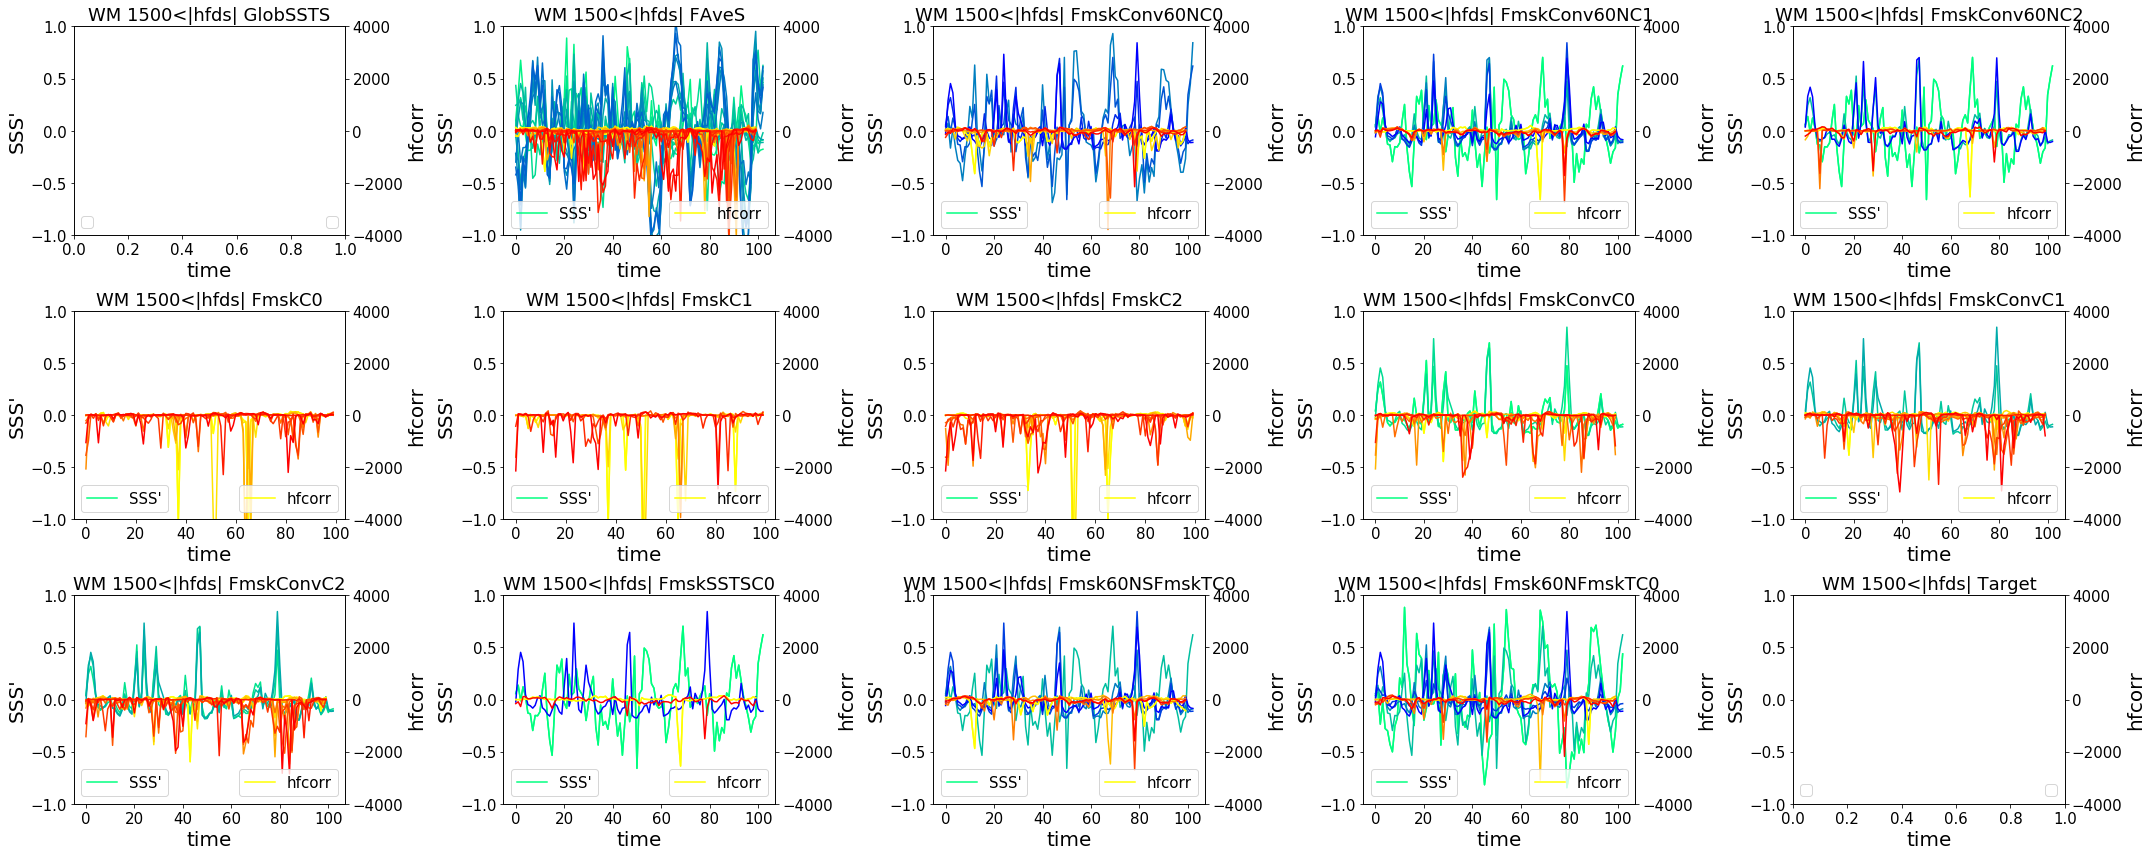

In [21]:
plt.close()
fig, axes = plt.subplots(3,5,figsize=(30,12))
i=-1
j=0
dir1 = '/ccc/store/cont003/thredds/estellav/Bining'
os.chdir(dir1)

for imodel in range(1,nmodels):
    
    i=i+1
    if i==5:
        i=0
        j=j+1



    f = Dataset(Models[imodel]['name']+'_55600101_56591231_1M_hfcorr.nc','r')
    tab=np.array(f.variables['hfcorr'][Models[imodel]['ts0']:Models[imodel]['ts1'],100:140,100:145])
    mask_tab=np.zeros((tab.shape[0],tab.shape[1],tab.shape[2]))
    mask_tab[ma.where(tab>1.e10)]=1.   
    tab_masked=ma.masked_where(mask_tab ==1., tab)
    tab_masked_temp=np.reshape(tab_masked,(12,tab_masked.shape[0]/12,tab_masked.shape[1],tab_masked.shape[2]),order='F')
    tos_target = tab_masked_temp[11,:,:,:]/3
    tos_target=tos_target + ma.sum(tab_masked_temp[:2,:,:,:],axis=0)/3
    
    ax1=axes[j,i].twinx()
    # mean
    mean=ma.max(np.abs(tos_target),axis=0)
    c=np.where((mean>1500)&(mean<10000))
    if len(c[0])!=0:
        colors_r = plt.cm.autumn_r(np.linspace(0, 1,len(c[0])))
        colors_g = plt.cm.winter_r(np.linspace(0, 1,len(c[0])))
        for k in range(len(c[0])):
            if k==0:
                ax1.plot(tos_target[:,c[0][k],c[1][k]], color=colors_r[k], label ='hfcorr')
                axes[j,i].plot(sss_Conv[:,c[0][k]+100,c[1][k]]-sss_FullRes[:,c[0][k]+100,c[1][k]], color=colors_g[k], label ="SSS'")            
            axes[j,i].plot(sss_Conv[:,c[0][k]+100,c[1][k]]-sss_FullRes[:,c[0][k]+100,c[1][k]], color=colors_g[k])
        for k in range(len(c[0])):
            ax1.plot(tos_target[:,c[0][k],c[1][k]],color=colors_r[k])
    
    axes[j,i].set_title(r'WM 1500<|hfds| ' +Models[imodel]['label'] , fontsize=18)
    axes[j,i].set_xlabel("time", fontsize=20)
    axes[j,i].set_ylabel("SSS'", fontsize=20)
    axes[j,i].tick_params(axis='y', labelsize=15)
    axes[j,i].tick_params(axis='x', labelsize=15)
    axes[j,i].legend(loc=3, fontsize=15,ncol=3)
    axes[j,i].set_ylim((-1.0,1.0))
    ax1.legend(loc=4, fontsize=15,ncol=3)
    ax1.set_xlabel("time", fontsize=20)
    ax1.set_ylabel("hfcorr", fontsize=20)
    ax1.tick_params(axis='y', labelsize=15)
    ax1.tick_params(axis='x', labelsize=15)
    ax1.set_ylim((-4000,4000))

plt.tight_layout()    
plt.show()    


Again, there is no 1 to 1 relationship between SSS anomaly and hfds peaks